# Зависимость ВВП России от цен на нефть в период с 1990 по 2024 гг.

### Формулирование проблемы

#### Предыстория проблемы

В 1970-х годов СССР подсел на, так называемую, **"нефтяную иглу"**. Этот термин обозначает экономическую зависимость страны от нефтянных доходов. Продажа нефти и нефтепродуктов приносила валютную выручку, позволяющую покупать зарубежные товары, но также ставила экономику в зависимую от цен на нефть позицию.

Такая зависимость во многом привела экономику Советского Союза в затруднительное положение в 1980-е. Но и с развалом Союза экономика уже Российской Федерации не избавилась от "нефтяной иглы": приватизированные нефтегазовые предприятия продолжали добывать и экспортировать заграницу энергоносители, приносив значительные доходы.

#### Нынешняя ситуация

За последние 25 лет Россия и ее экономика пережили множество потрясений: 
- развал Советского Союза в 1991 г. и последующее восстановление экономики;
- дефолт 1998 г.;
- "сытые" нулевые, окончившиеся кризисом 2008 г.;
- "Крымская весна" и последующий ввод санкций в 2014 г.;
- начало СВО, повлекшее рост инфляции, уход зарубежных компаний и т.д.

Эти испытания напрямую отражались на состоянии экономики: в некоторых случаях рост цен на нефть помогал стране выбраться из сложной ситуации, а в других из-за кризисов падала цена нефтепродуктов, что уже отражалось в изменении доходов страны.

Руководство Российской Федерации понимает опасности зависимости экономики от нефтянных доходов и принимает различные меры по диверсификации экономики. Оценив изменение ВВП в соотвествии с изменением цен на нефть, мы изучим проблему: **Изменение характера зависимости ВВП от цен на нефть во времени**

## Формулирование задач

Для изучения данного объекта и поставленной проблемы требуется выполнить следующие задачи:
- выбрать инструменты для анализа;
- найти источники данных;
- объединить их в одну таблицу;
- визуализировать исходные данные;
- нормировать данные и визуализировать на одном графике;
- провести анализ базовых статистик (min, max, avg и т.д.);
- описать временной ряд;
- провести аналитическое выравнивание.

## Выбор инструментов

Для проведения статистического анализа представленных данных и исследования проблемы нужен набор инструментов. Будет использоваться язык Python, который включает в себя библиотеки для анализа данных:
- numpy (для математических вычислений);
- pandas (для работы с данными и таблицами);
- matplotlib (для визуализации данных);
- sympy и IPython (для отображения формул в выводе);
- scipy (для инженерных и научных расчетов)
- ...

In [336]:
# Импортируем эти библиотеки и функции в проект:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
from IPython.display import display, Math
from scipy import stats

## Поиск источников данных

Будут использоваться открытые данные:
- /// (статистика цен на нефть)
- /// (статистика ВВП России)

## Объединение исходных данных

Считаем данные из датасетов, скачанных с источников, и объединим в одну таблицу.

In [337]:
gdp_data = pd.read_csv("../../data_sets/Russia_GRP.csv")
oil_data = pd.read_csv("../../data_sets/crude-oil-price.csv")

In [338]:
# Преобразование из date в datetime
oil_data["date"] = pd.to_datetime(oil_data["date"])
# Извлекаем год из даты
oil_data["year"] = oil_data["date"].dt.year

In [339]:
# Группировка по дате и вычисление средней цены
avg_price_frame = oil_data.groupby("year")["price"].mean().reset_index()

In [340]:
# Переменные исследуемого периода
start_date = 1990
end_date = 2024

In [341]:
# Выборка нужных данных в Series
year_series = gdp_data[
    (gdp_data["Variable observation date"] >= start_date) 
    & (gdp_data["Variable observation date"] <= end_date)
]["Variable observation date"].reset_index(drop=True)

avg_price_series = round(avg_price_frame[
    (avg_price_frame["year"] >= start_date) 
    & (avg_price_frame["year"] <= end_date)
]["price"], 2).reset_index(drop=True)

gdp_series = round(
    gdp_data[
    (gdp_data["Variable observation date"] >= start_date) 
    & (gdp_data["Variable observation date"] <= end_date)
    ]["Variable observation value"] / 1000000000, 3).reset_index(drop=True)

In [342]:
frame = {
    "year": year_series,
    "oil_price": avg_price_series,
    "gdp": gdp_series
}

df = pd.DataFrame(frame)

## Визуализация данных
Выведем таблицу и визуализируем данные

In [343]:
df

,year,oil_price,gdp
0,1990,24.80,517.014
1,1991,21.09,517.963
2,1992,20.55,460.291
3,1993,18.52,435.084
4,1994,17.40,395.077
5,1995,18.42,395.537
6,1996,21.72,391.725
7,1997,20.38,404.929
8,1998,14.53,270.955
9,1999,19.64,195.907


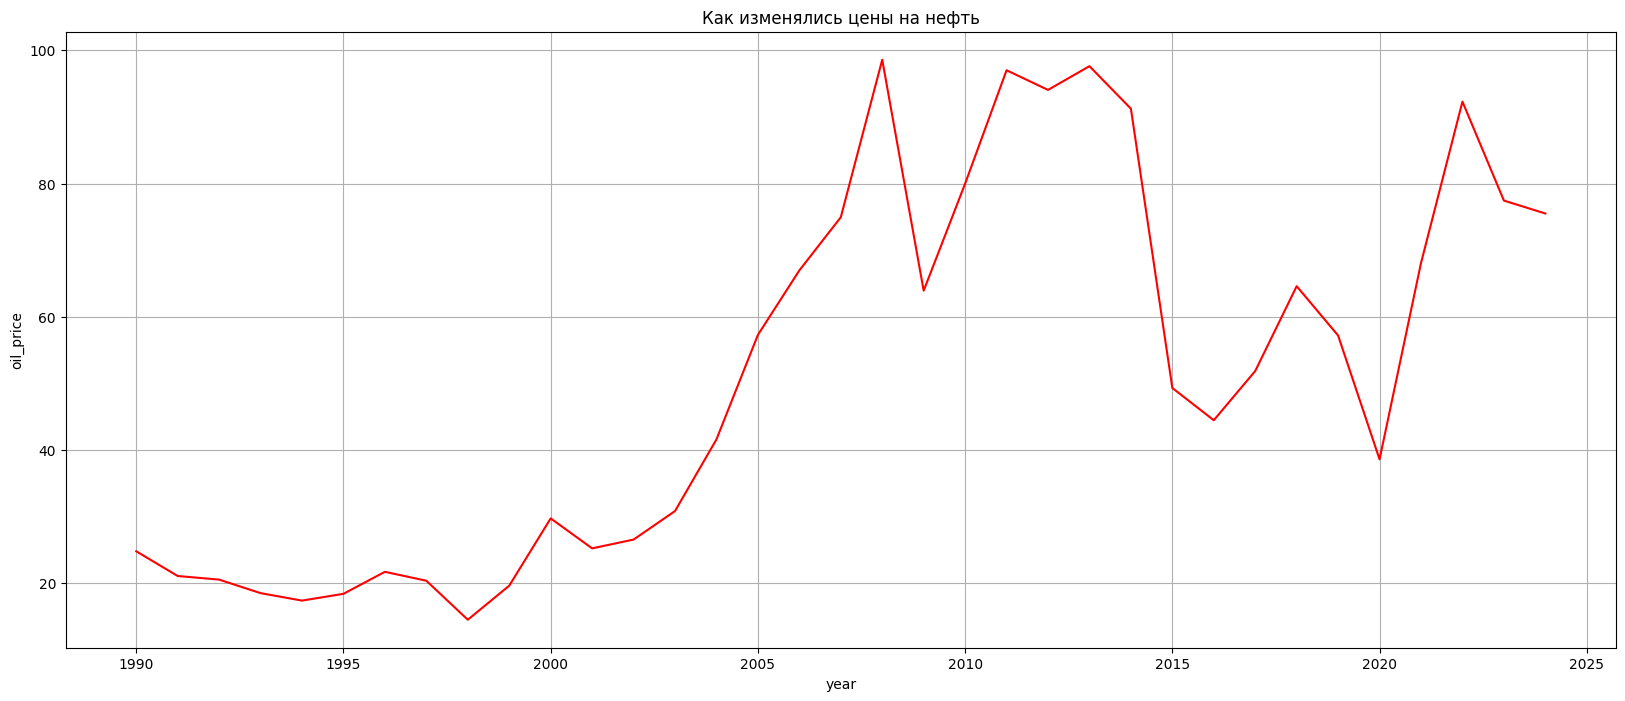

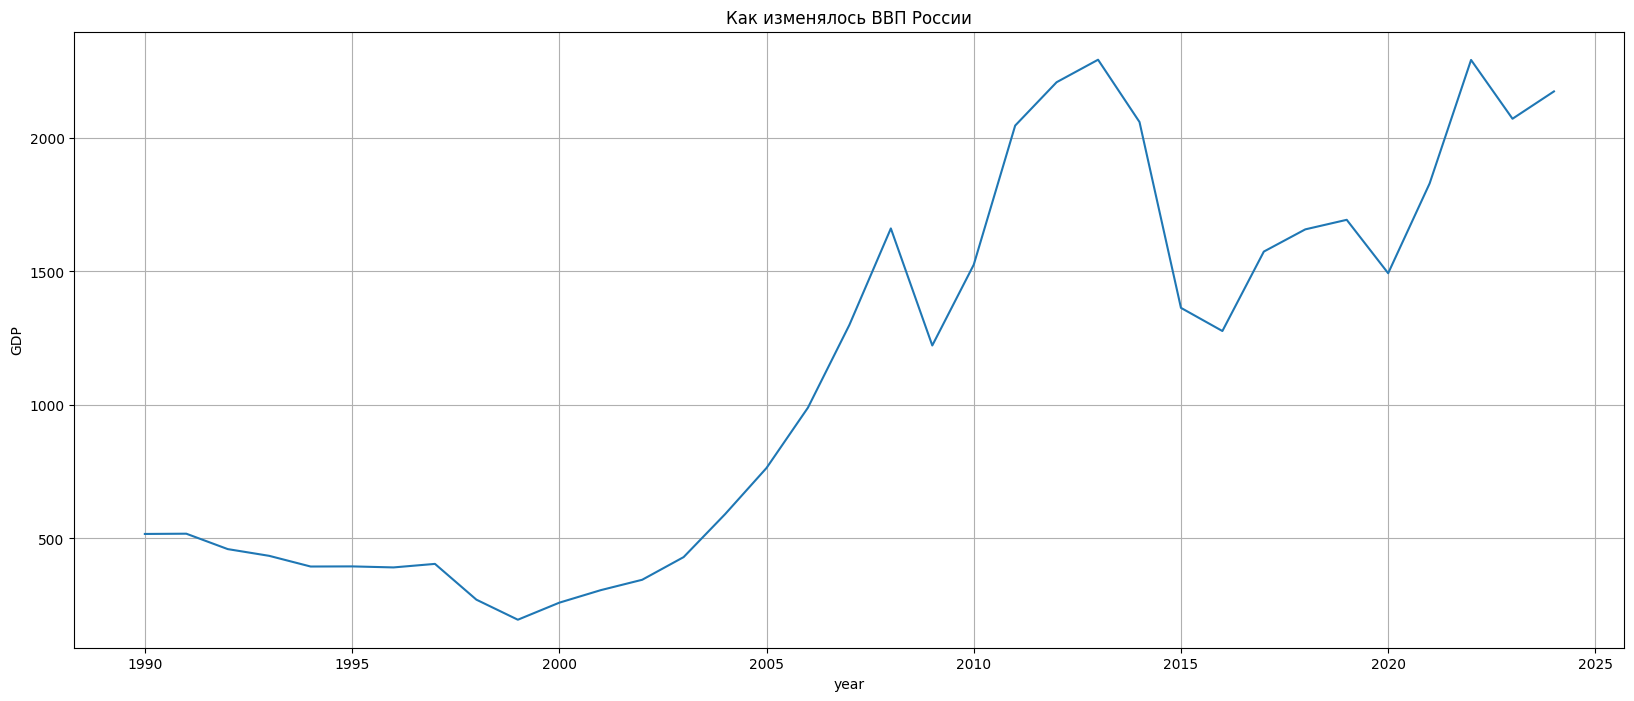

In [344]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(df["year"], df["oil_price"], color='r')
ax.set(xlabel="year", ylabel="oil_price", title="Как изменялись цены на нефть")
ax.grid()

fig, bx = plt.subplots(figsize=(20, 8))
bx.plot(df["year"], df["gdp"])
bx.set(xlabel="year", ylabel="GDP", title="Как изменялось ВВП России")
bx.grid()
plt.show()

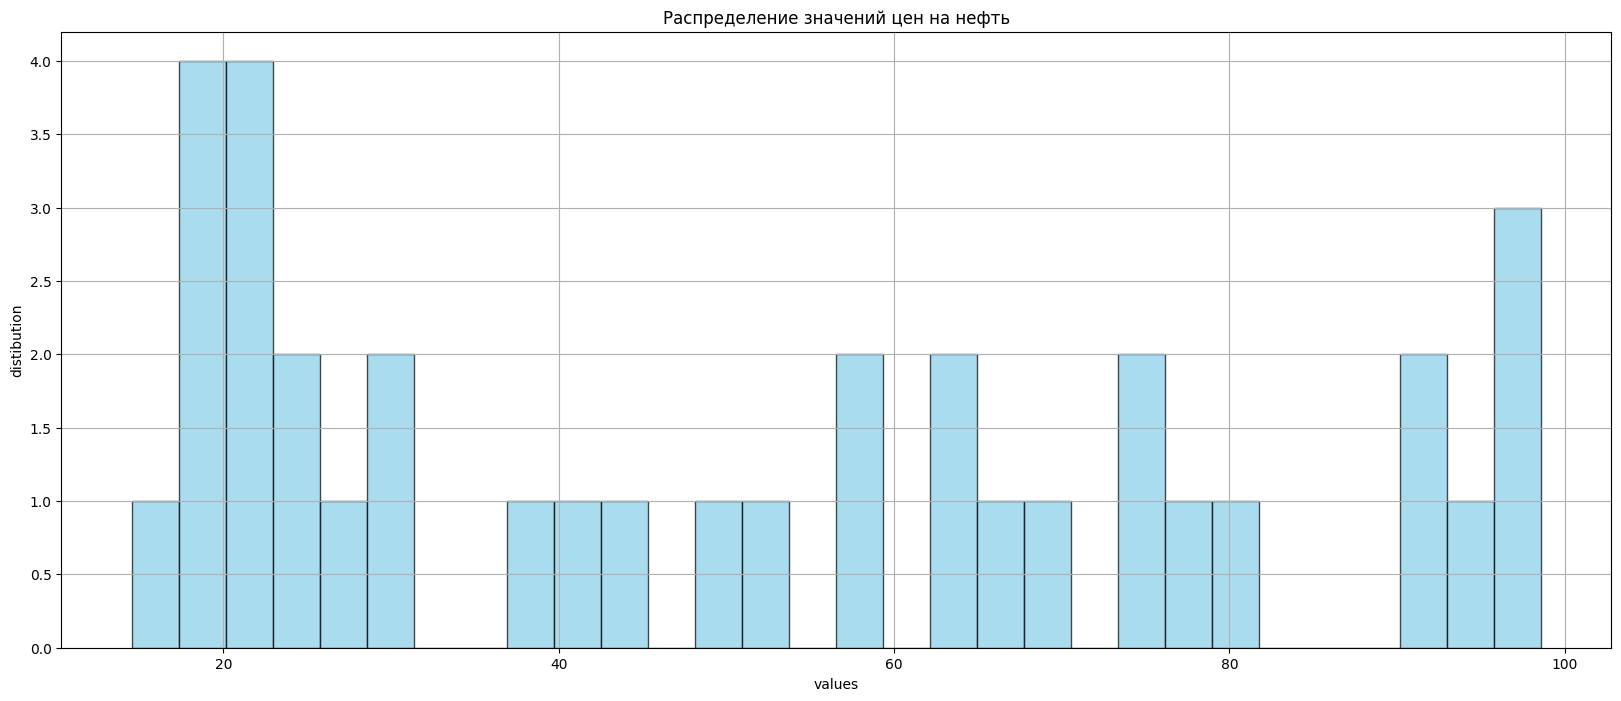

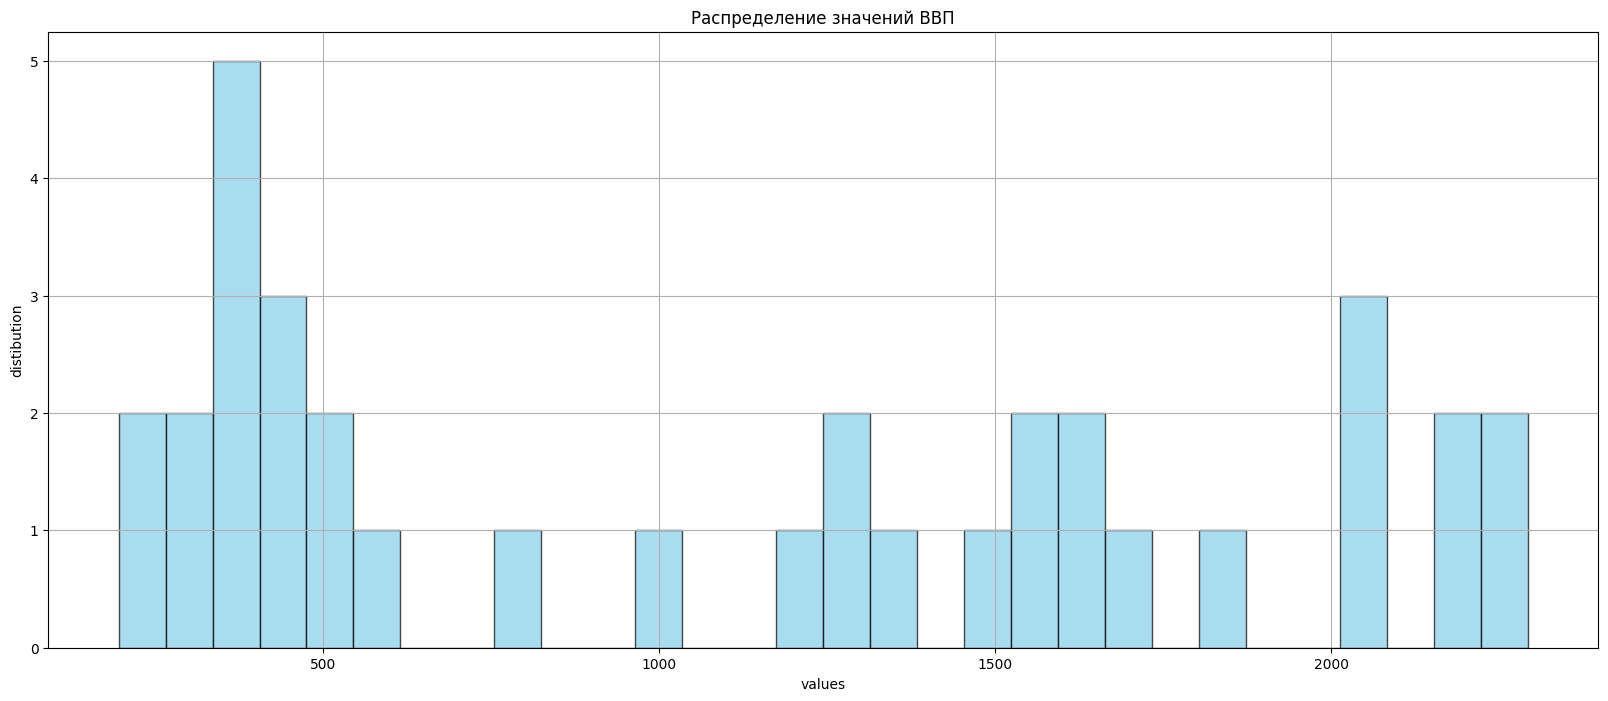

In [345]:
fig, ax = plt.subplots(figsize=(20,8))
ax.hist(df["oil_price"], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
ax.set(xlabel="values", ylabel="distibution", title="Распределение значений цен на нефть")
ax.grid()

fig, bx = plt.subplots(figsize=(20,8))
bx.hist(df["gdp"], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
bx.set(xlabel="values", ylabel="distibution", title="Распределение значений ВВП")
bx.grid()

plt.show()

## Нормализация и визуализация

Нормируем значения цен и ВВП к базовому значению (самому раннему) для рассмотрения относительного роста

In [346]:
base_price = df["oil_price"].values[0]
base_gdp = df["gdp"].values[0]

df["oil_price_normalized"] = ((df["oil_price"] / base_price) * 100).round(3)
df["gdp_normalized"] = ((df["gdp"] / base_gdp) * 100).round(3)

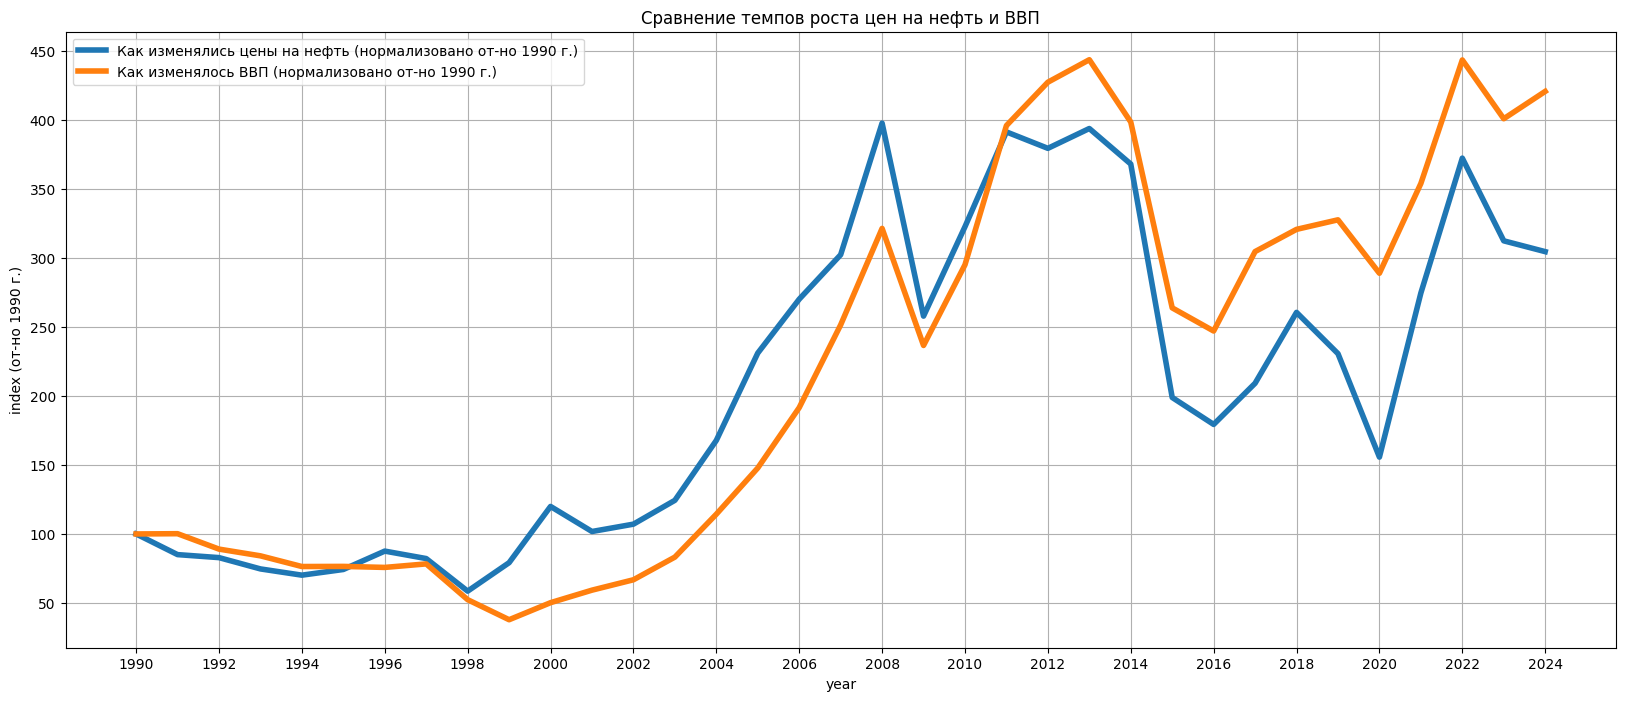

In [347]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(df["year"], df["oil_price_normalized"], label="Как изменялись цены на нефть (нормализовано от-но 1990 г.)", linewidth=4)
ax.plot(df["year"], df["gdp_normalized"], label="Как изменялось ВВП (нормализовано от-но 1990 г.)", linewidth=4)
ax.set(xlabel="year", ylabel="index (от-но 1990 г.)", title="Сравнение темпов роста цен на нефть и ВВП")
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.legend()
ax.grid()
plt.show()

## Анализ базовых статистик

Рассмотрим данные и определим базовую статистику (min, max, avg и т.д.).

In [348]:
oil_desc = df["oil_price"].describe()
print("Статистика цен на нефть:")
for index, value in oil_desc.items():
    print(f"{index}:\t{round(value, 2)}")

Статистика цен на нефть:
count:	35.0
mean:	51.2
std:	28.54
min:	14.53
25%:	23.26
50%:	49.31
75%:	75.22
max:	98.58


In [349]:
gdp_desc = df["gdp"].describe()
print("Статистика ВВП:")
for index, value in gdp_desc.items():
    print(f"{index}:\t{round(value, 3)}")

Статистика ВВП:
count:	35.0
mean:	1125.993
std:	726.245
min:	195.907
25%:	417.638
50%:	1222.646
75%:	1676.981
max:	2292.47


## Описание временного ряда

Применим различные методы описания временных рядов к нашим данным.

#### Расчет средних темпов роста

In [350]:
gdp_growth_rate = (df["gdp"].iloc[-1] / df["gdp"].iloc[0]) ** (1 / (len(df) - 1))
print(f"Средний темп роста ВВП: {(gdp_growth_rate - 1) * 100:.2f}%")

Средний темп роста ВВП: 4.31%


#### Расчет простых скользящих средних и визуализация

In [351]:
# Определим интервал сглаживания
m = 7

# Рассчитаем простую скользящую среднюю (центральное окно) 
df["gdp_sma"] = df["gdp"].rolling(window=m, center=True).mean().round(3)

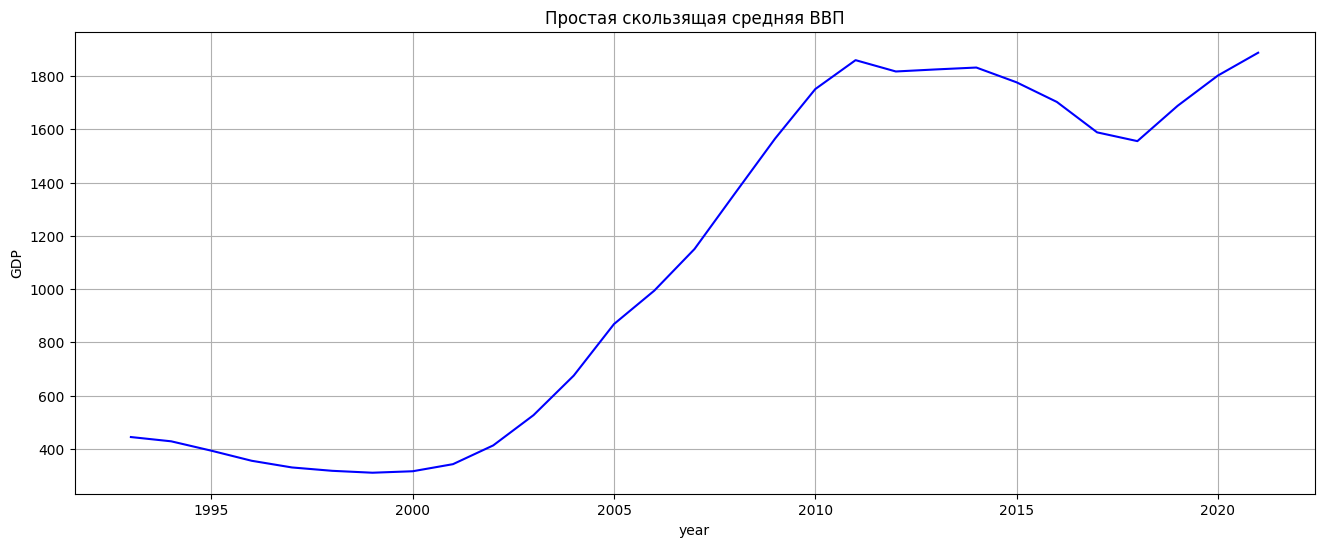

In [352]:
fig, bx = plt.subplots(figsize=(16, 6))
bx.plot(df["year"], df["gdp_sma"], color='b')
bx.set(xlabel="year", ylabel="GDP", title="Простая скользящая средняя ВВП")
bx.grid()

plt.show()

#### Расчет взвешенных скользящих средних

Данный расчет не пригоден, веса для исследуемого набора данных не нужны, т.к. данные представлены за каждый год, которые имеют свою ценность в рамках анализа всего периода.

#### Расчет экспоненциальных скользящих средних

In [353]:
# Определим коэффициент сглаживания
alpha = 0.3

df["gdp_ema"] = df["gdp"].ewm(alpha=alpha, adjust=False).mean().round(3)

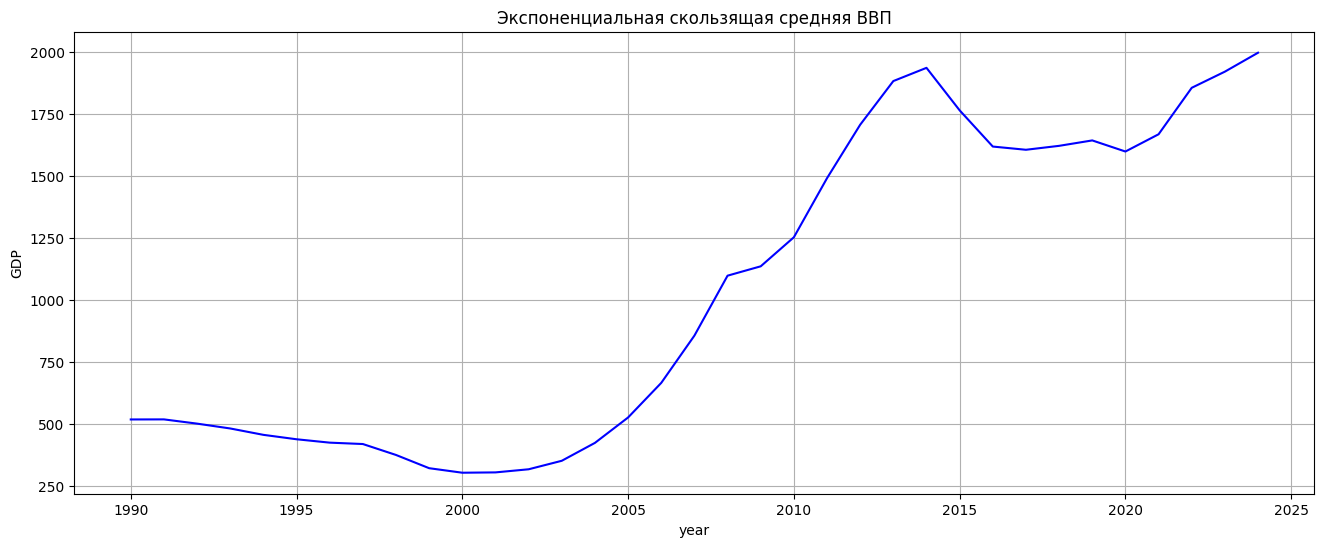

In [354]:
fig, bx = plt.subplots(figsize=(16, 6))
bx.plot(df["year"], df["gdp_ema"], color='b')
bx.set(xlabel="year", ylabel="GDP", title="Экспоненциальная скользящая средняя ВВП")
bx.grid()
plt.show()

## Аналитическое выравнивание

Процесс выравнивания состоит из двух этапов:
- выбор функц. зависимости;
- определение значений кривой.

#### Выбор функциональной зависимости

##### Зависимость через средний темп роста

In [355]:
a_agr = df["gdp"].values[0]

latex_str = f"""y_i = {a_agr} \\cdot {gdp_growth_rate:.2f}^{{i-1}}"""
display(Math(latex_str))

<IPython.core.display.Math object>

##### Линейная зависимость

In [356]:
coeffs_linear = np.polyfit(np.arange(1, len(df)+1), df["gdp"], deg=1)
b_linear, a_linear = coeffs_linear

latex_str = f"y = {a_linear:.2f} + {b_linear:.2f}x"
display(Math(latex_str))

<IPython.core.display.Math object>

##### Степенная зависимость
Для линеаризации прологарифмируем обе части: $ln(y) = ln(a) + b*ln(x)$

In [357]:
# Логарифмирование
x_log = np.log(np.arange(1, len(df)+1))
y_log = np.log(df["gdp"])

coeffs_power = np.polyfit(x_log, y_log, deg=1)
b_power = coeffs_power[0]
a_power = np.exp(coeffs_power[1])

latex_str = f"y = {a_power:.2f} \\cdot x^{{{b_power:.4f}}}"
display(Math(latex_str))

<IPython.core.display.Math object>

##### Показательная зависимость
Для линеаризации прологарифмируем обе части: $ln(y) = ln(a) + x * ln(b)$

In [358]:
# Логарифмирование
y_log = np.log(df["gdp"])

coeffs_exp = np.polyfit(np.arange(1, len(df)+1), y_log, deg=1)
b_exp, a_exp = np.exp(coeffs_exp)

latex_str = f"y = {a_exp:.2f} \\cdot {b_exp:.4f}^x"
display(Math(latex_str))

<IPython.core.display.Math object>

#### Определение значений кривой
Используем полученные коэффициенты и рассчитаем значения

In [359]:
df["gdp_agr"] = (df["gdp"].values[0] * gdp_growth_rate ** df.index.to_numpy()).round(3)
df["gdp_linear"] = (a_linear + b_linear * np.arange(1, len(df)+1)).round(3)
df["gdp_power"] = (a_power * np.arange(1, len(df)+1) ** b_power).round(3)
df["gdp_exp"] = (a_exp * b_exp ** np.arange(1, len(df)+1)).round(3)

In [360]:
df

,year,oil_price,gdp,oil_price_normalized,gdp_normalized,gdp_sma,gdp_ema,gdp_agr,gdp_linear,gdp_power,gdp_exp
0,1990,24.80,517.014,100.000,100.000,NaN,517.014,517.014,85.324,162.283,289.082
1,1991,21.09,517.963,85.040,100.184,NaN,517.299,539.321,146.540,252.335,308.389
2,1992,20.55,460.291,82.863,89.029,NaN,500.196,562.590,207.755,326.676,328.985
3,1993,18.52,435.084,74.677,84.153,444.670,480.663,586.863,268.971,392.358,350.956
4,1994,17.40,395.077,70.161,76.415,428.658,454.987,612.184,330.187,452.269,374.395
5,1995,18.42,395.537,74.274,76.504,393.371,437.152,638.596,391.403,507.951,399.400
6,1996,21.72,391.725,87.581,75.767,355.602,423.524,666.149,452.619,560.345,426.074
7,1997,20.38,404.929,82.177,78.321,330.549,417.945,694.890,513.835,610.080,454.530
8,1998,14.53,270.955,58.589,52.408,317.909,373.848,724.871,575.050,657.601,484.886
9,1999,19.64,195.907,79.194,37.892,310.757,320.466,756.146,636.266,703.237,517.270


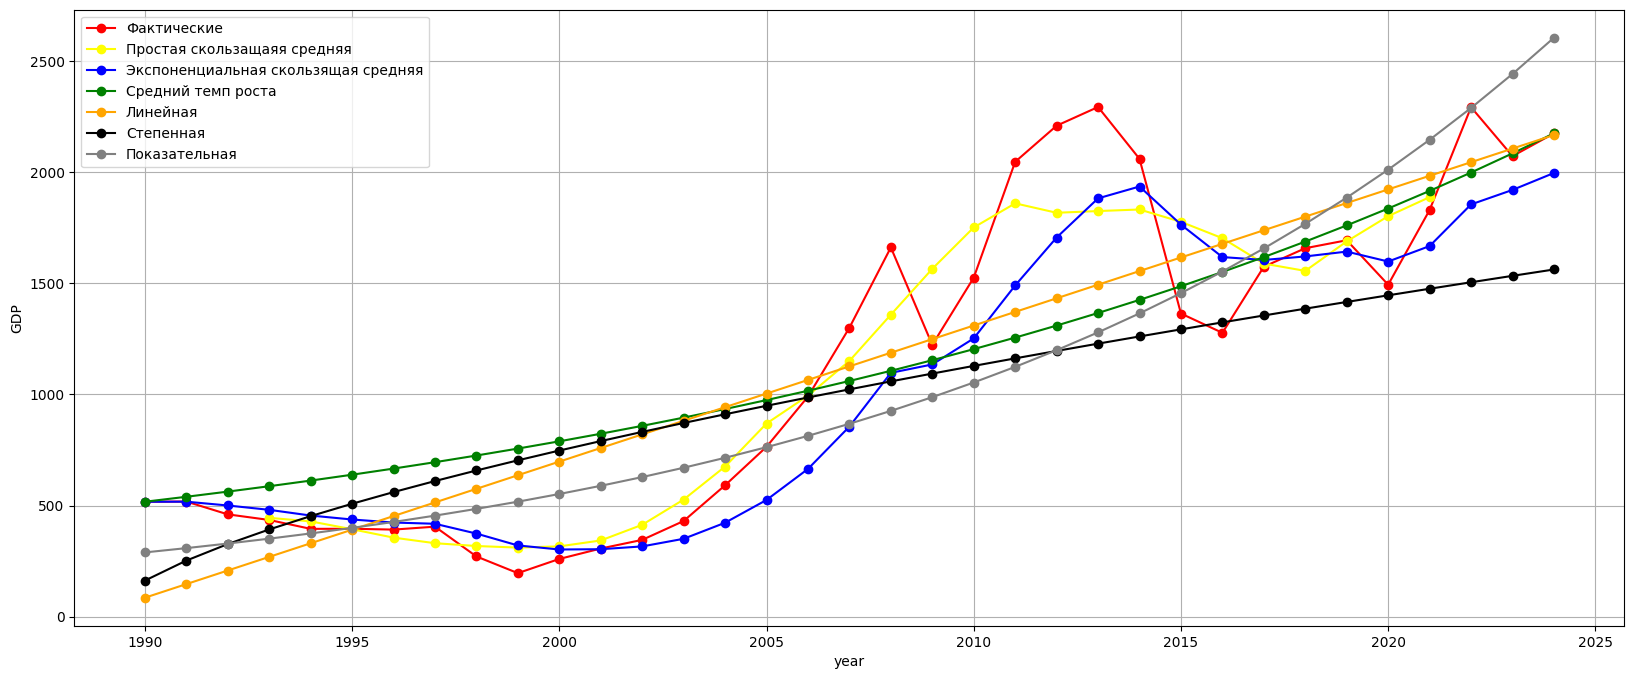

In [361]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(df["year"], df["gdp"], color='red', label='Фактические', marker='o')
ax.plot(df["year"], df["gdp_sma"], color='yellow', label='Простая скользащаяя средняя', marker='o')
ax.plot(df["year"], df["gdp_ema"], color='blue', label='Экспоненциальная скользящая средняя', marker='o')
ax.plot(df["year"], df["gdp_agr"], color='green', label='Средний темп роста', marker='o')
ax.plot(df["year"], df["gdp_linear"], color='orange', label='Линейная', marker='o')
ax.plot(df["year"], df["gdp_power"], color='black', label='Степенная', marker='o')
ax.plot(df["year"], df["gdp_exp"], color='grey', label='Показательная', marker='o')
ax.set(xlabel="year", ylabel="GDP", label="Сравнение функц. зависимостей")
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.grid()
ax.legend()
plt.show()

#### Расчет ошибок и выбор функц. зависимости
Расчитаем сумму ошибок каждой зависимости с помощью МНК и выберем зависимость с наименьшей ошибкой.

In [362]:
frame = {
    "sma": (df["gdp_sma"] - df["gdp"]) ** 2,
    "ema": (df["gdp_ema"] - df["gdp"]) ** 2,
    "agr": (df["gdp_agr"] - df["gdp"]) ** 2,
    "linear": (df["gdp_linear"] - df["gdp"]) ** 2,
    "power": (df["gdp_power"] - df["gdp"]) ** 2,
    "exp": (df["gdp_exp"] - df["gdp"]) ** 2
}
error_df = pd.DataFrame(frame)

In [363]:
print(f"Значение наименьшей ошибки: {error_df.sum().min()}")
print(f"Более оптимальная функц. зависимость - {error_df.sum().idxmin()}")

Значение наименьшей ошибки: 1261154.873522
Более оптимальная функц. зависимость - sma


#### Расчет формальных критериев аппроксимации

In [364]:
n = len(df)
p = 1

##### Среднеквадратичная ошибка аппроксимации

In [365]:
avg_approx_sma = (error_df["sma"].sum() / (n - p - 1)).round(3)
avg_approx_ema = (error_df["ema"].sum() / (n - p - 1)).round(3)
avg_approx_agr = (error_df["agr"].sum() / (n - p - 1)).round(3)
avg_approx_linear = (error_df["linear"].sum() / (n - p - 1)).round(3)
avg_approx_power = (error_df["power"].sum() / (n - p - 1)).round(3)
avg_approx_exp = (error_df["exp"].sum() / (n - p - 1)).round(3)

##### Критерий Фишера

In [366]:
# Общая дисперсия
total_variance = ((df["gdp"] - df["gdp"].mean()) ** 2).sum() / (n - 1)

F_sma = total_variance / avg_approx_sma
F_ema = total_variance / avg_approx_ema
F_agr = total_variance / avg_approx_agr
F_linear = total_variance / avg_approx_linear
F_power = total_variance / avg_approx_power
F_exp = total_variance / avg_approx_exp

In [367]:
print(f"Назв\tСред. аппрок.\tКрит. Фишера")
print(f"sma:\t{avg_approx_sma}\t{F_sma}")
print(f"ema:\t{avg_approx_ema}\t{F_ema}")
print(f"agr:\t{avg_approx_agr}\t{F_agr}")
print(f"lin:\t{avg_approx_linear}\t{F_linear}")
print(f"pow:\t{avg_approx_power}\t{F_power}")
print(f"exp:\t{avg_approx_exp}\t{F_exp}")

Назв	Сред. аппрок.	Крит. Фишера
sma:	38216.814	13.801033955159241
ema:	65014.158	8.112564461297875
agr:	166170.706	3.174034463523342
lin:	138016.179	3.8215197051064935
pow:	229048.302	2.3027088306989723
exp:	176862.813	2.9821506212954163


##### Рассчет F критического

In [368]:
v1 = n - 1
v2 = n - p - 1
a = 0.05
latex_str = f"v1 = {v1}; v2 = {v2}; a = {a}"
display(Math(latex_str))

F_crit = stats.f.ppf(1 - a, v1, v2)
latex_str = f"F_{{кр}} = {F_crit:.4f}"
display(Math(latex_str))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [369]:
latex_str = f"F_{{расч}} = {F_sma:.4f}"
display(Math(latex_str))

<IPython.core.display.Math object>

## Регрессионный анализ

Вернем таблицу к исходному виду.

In [370]:
frame = {
    "year": year_series,
    "oil_price": avg_price_series,
    "gdp": gdp_series
}

df = pd.DataFrame(frame)
df

,year,oil_price,gdp
0,1990,24.80,517.014
1,1991,21.09,517.963
2,1992,20.55,460.291
3,1993,18.52,435.084
4,1994,17.40,395.077
5,1995,18.42,395.537
6,1996,21.72,391.725
7,1997,20.38,404.929
8,1998,14.53,270.955
9,1999,19.64,195.907


### Визуальный анализ корреляции данных

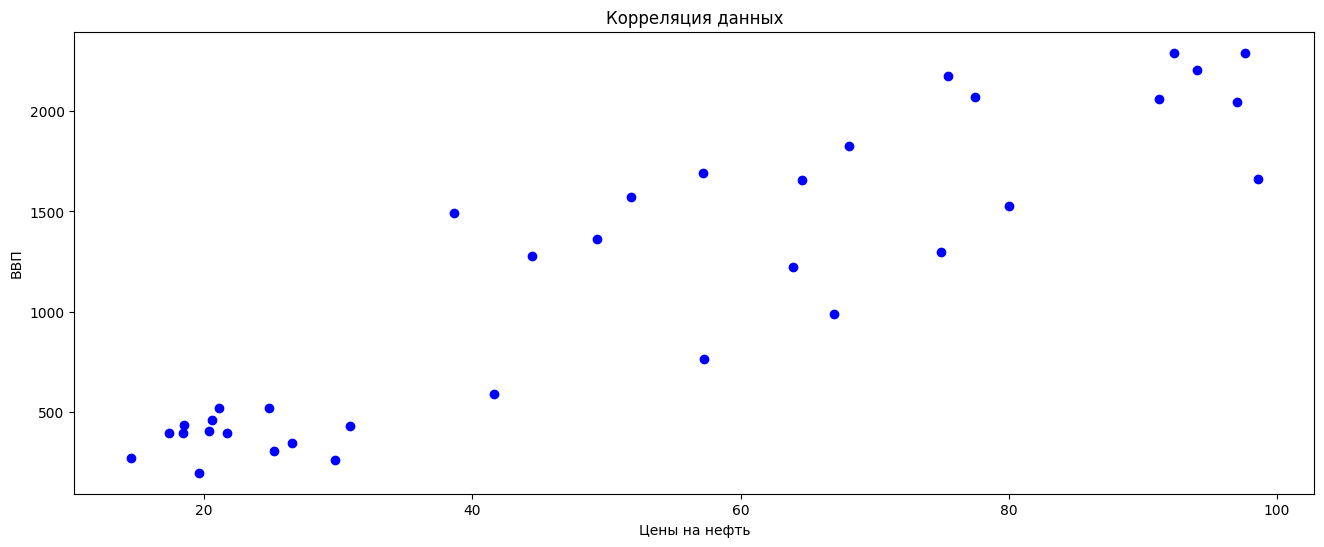

In [371]:
fig, ax = plt.subplots(figsize=(16,6))
ax.scatter(df["oil_price"], df["gdp"], color='blue', alpha=1)
ax.set(xlabel='Цены на нефть', ylabel='ВВП', title="Корреляция данных")
plt.show()

Рассмотрев корреляцию ВВП России от цен на нефть на графике, можем предположить, что зависимость описывается **степенной**, **экспоненциальной** или **логарифмической** функцией. Построим модель каждой функции оценим их с помощью **коэффициента детерминации** и **критерия Фишера**.

### Степенная модель

Степенное уравнение парной регрессии выглядит следующим образом:
$$y'= ax^b$$
где y' - оценка условного мат. ожидания y;
a,b - эмп. коэффициенты регрессии.
Для построения модели линеаризуем модель и найдем коэффициенты.

In [372]:
# Логарифмирование
x_log = np.log(df["oil_price"])
y_log = np.log(df["gdp"])

coeffs_power = np.polyfit(x_log, y_log, deg=1)
b_power = coeffs_power[0]
a_power = np.exp(coeffs_power[1])

latex_str = f"y' = {a_power:.2f} \\cdot x^{{{b_power:.4f}}}"
display(Math(latex_str))

<IPython.core.display.Math object>

In [373]:
df["power_model"] = (a_power * df["oil_price"] ** b_power).round(3)

In [374]:
from sklearn.metrics import r2_score        # Импорт функции расчета коэф.детерминации

In [375]:
R_squared_power = r2_score(df["gdp"], df["power_model"])
latex_str = f"R^2 = {R_squared_power:.4f}"
display(Math(latex_str))

<IPython.core.display.Math object>

In [376]:
n = len(df)
m = 1

F_power = (R_squared_power / m) / ((1 - R_squared_power)/(n - m - 1))
latex_str = f"F_р = {F_power:.2f}"
display(Math(latex_str))
F_crit = stats.f.ppf(1 - a, m, n-m-1)
latex_str = f"F_{{крит}} = {F_crit:.2f}"
display(Math(latex_str))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Так как F_р > F_крит можем сделать вывод о **статистической значимости** модели.

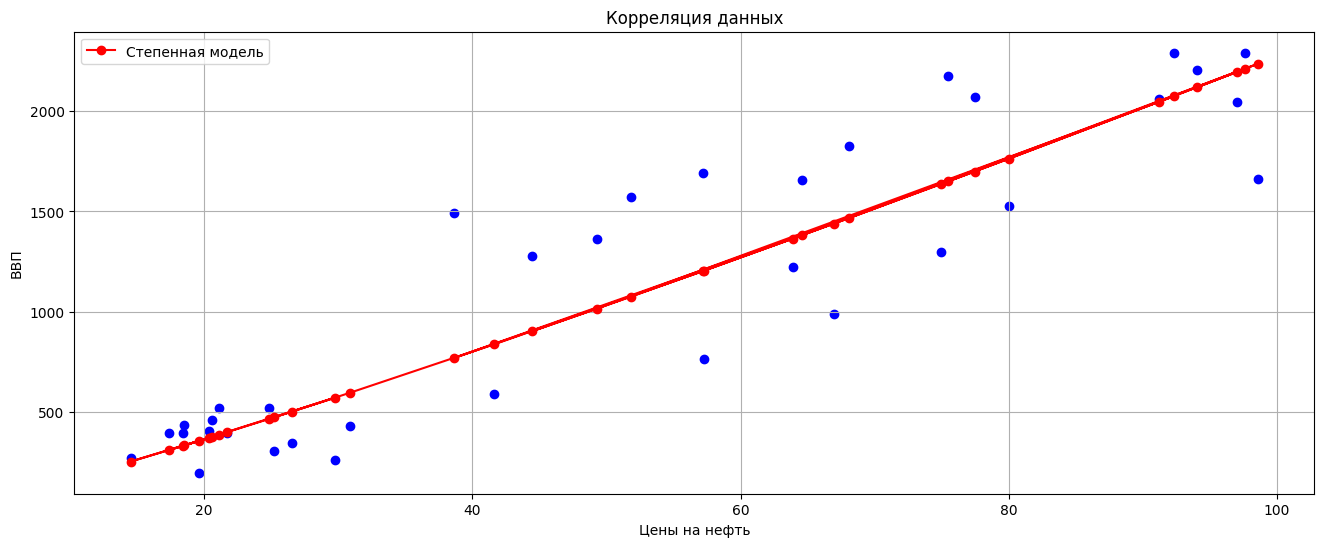

In [377]:
fig, ax = plt.subplots(figsize=(16,6))
ax.scatter(df["oil_price"], df["gdp"], color='blue', alpha=1)
ax.set(xlabel='Цены на нефть', ylabel='ВВП', title="Корреляция данных")

ax.plot(df["oil_price"], df["power_model"], color='red', marker='o', label="Степенная модель")

plt.legend()
plt.grid()
plt.show()

### Экспоненциальная модель

Экспоненциальное (показательное) уравнение парной регрессии имеет вид:
$$y' = ab^x$$
где y' - оценка условного мат. ожидания y;
a,b - эмп. коэффициенты регрессии.
Для построения модели линеаризуем модель и найдем коэффициенты.

In [378]:
# Логарифмирование
y_log = np.log(df["gdp"])

coeffs_exp = np.polyfit(df["oil_price"], y_log, deg=1)
b_exp, a_exp = np.exp(coeffs_exp)

latex_str = f"y' = {a_exp:.2f} \\cdot {b_exp:.4f}^x"
display(Math(latex_str))

<IPython.core.display.Math object>

In [379]:
df["exp_model"] = (a_exp * b_exp ** df["oil_price"]).round(3)

In [380]:
R_squared_exp = r2_score(df["gdp"], df["exp_model"])
latex_str = f"R^2 = {R_squared_exp:.4f}"
display(Math(latex_str))

<IPython.core.display.Math object>

In [381]:
n = len(df)
m = 1

F_exp = (R_squared_exp / m) / ((1 - R_squared_exp)/(n - m - 1))
latex_str = f"F_р = {F_exp:.2f}"
display(Math(latex_str))
F_crit = stats.f.ppf(1 - a, m, n-m-1)
latex_str = f"F_{{крит}} = {F_crit:.2f}"
display(Math(latex_str))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Так как F_р > F_крит можем сделать вывод о **статистической значимости** модели.

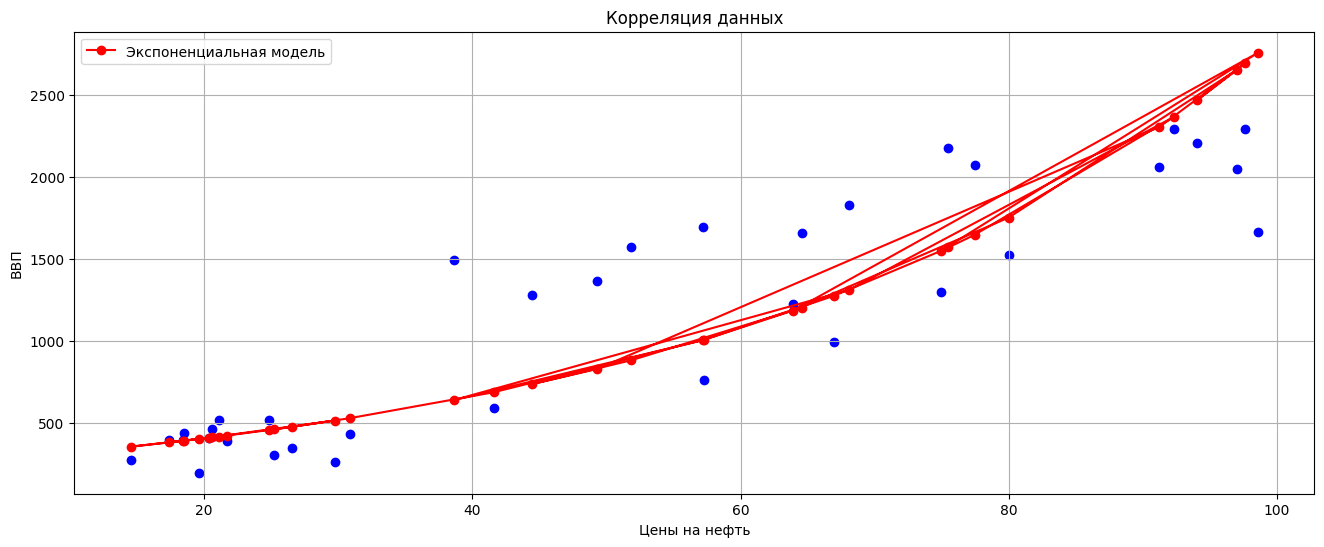

In [382]:
fig, ax = plt.subplots(figsize=(16,6))
ax.scatter(df["oil_price"], df["gdp"], color='blue', alpha=1)
ax.set(xlabel='Цены на нефть', ylabel='ВВП', title="Корреляция данных")

ax.plot(df["oil_price"], df["exp_model"], color='red', marker='o', label="Экспоненциальная модель")

plt.legend()
plt.grid()
plt.show()

### Логарифмическая модель

Логарифмическое уравнение парной регрессии имеет вид:
$$y' = a*b*ln(x)$$
где y' - оценка условного мат. ожидания y;
a,b - эмп. коэффициенты регрессии.
Для построения модели найдем коэффициенты.

In [383]:
# Логарифмирование
x_log = np.log(df["oil_price"])

coeffs_log = np.polyfit(x_log, df["gdp"], deg=1)
b_log = coeffs_log[0]
a_log = coeffs_log[1]

latex_str = f"y' = {a_log:.2f} \\cdot {b_log:.2f}ln(x)"
display(Math(latex_str))

<IPython.core.display.Math object>

In [384]:
df["log_model"] = a_log + b_log * x_log

In [385]:
R_squared = r2_score(df["gdp"], df["log_model"])
latex_str = f"R^2 = {R_squared:.4f}"
display(Math(latex_str))

<IPython.core.display.Math object>

In [386]:
n = len(df)
m = 1

F_log = (R_squared / m) / ((1 - R_squared)/(n - m - 1))
latex_str = f"F_р = {F_log:.2f}"
display(Math(latex_str))
F_crit = stats.f.ppf(1 - a, m, n-m-1)
latex_str = f"F_{{крит}} = {F_crit:.2f}"
display(Math(latex_str))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Так как F_р > F_крит можем сделать вывод о **статистической значимости** модели.

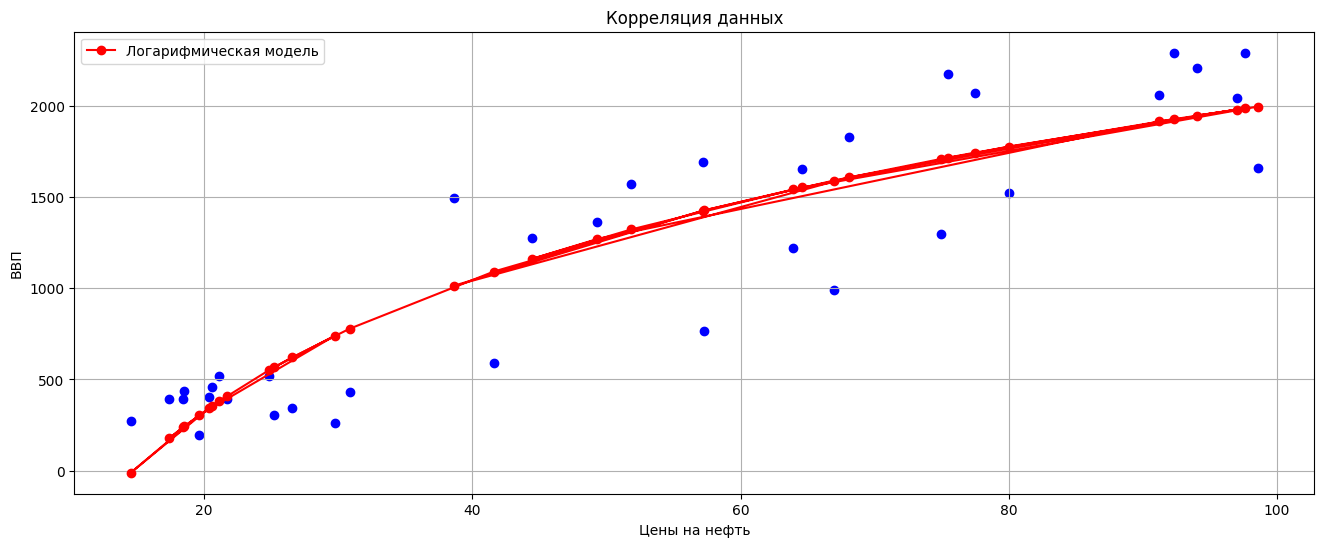

In [387]:
fig, ax = plt.subplots(figsize=(16,6))
ax.scatter(df["oil_price"], df["gdp"], color='blue', alpha=1)
ax.set(xlabel='Цены на нефть', ylabel='ВВП', title="Корреляция данных")

ax.plot(df["oil_price"], df["log_model"], color='red', marker='o', label="Логарифмическая модель")

plt.legend()
plt.grid()
plt.show()

### Подведение итогов анализа

In [388]:
display(Math(f"F_р (степ) = {F_power:.2f}"))
display(Math(f"F_р (эксп) = {F_exp:.2f}"))
display(Math(f"F_р (лог) = {F_log:.2f}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Все три модели статистически значимы, рассмотрим значения их F_р. Наибольшее значение имеет **степенная модель**, таким образом более точной будет именно эта зависимость. **Зависимость между ценами на нефть и ВВП России несет степенной характер**.

In [389]:
latex_str = f"y' = {a_power:.2f} \\cdot x^{{{b_power:.4f}}}"
display(Math(latex_str))

<IPython.core.display.Math object>

#### Трактовка коэффициентов

1. Коэффициент a (11.89) - коэффициент масштабирования модели.
2. Коэффициент b (1.1408) - коэффициент эластичности. Указывает на то, что связь является возрастающей. Интерпретируем это как при росте цен на нефть на 1%, ВВП в среднем вырастает на 1.1408%

In [390]:
F_crit = stats.f.ppf(1 - a, 70, 68)
latex_str = f"F_{{крит}} = {F_crit:.2f}"
display(Math(latex_str))

<IPython.core.display.Math object>

## Регрессионный анализ посредством нейросети

Модель будем строить на основе нейронной сети, построенной с помощью библиотек Keras и Tensorflow.

In [391]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Подготовка данных

In [392]:
frame = {
    "year": year_series,
    "oil_price": avg_price_series,
    "gdp": gdp_series
}

df = pd.DataFrame(frame)
df

,year,oil_price,gdp
0,1990,24.80,517.014
1,1991,21.09,517.963
2,1992,20.55,460.291
3,1993,18.52,435.084
4,1994,17.40,395.077
5,1995,18.42,395.537
6,1996,21.72,391.725
7,1997,20.38,404.929
8,1998,14.53,270.955
9,1999,19.64,195.907


Разделим данные на обучающую и тестовую выборки. Также данные нужно промасштабировать:

In [393]:
X_train, X_test, y_train, y_test = train_test_split(df["oil_price"].to_numpy(), df["gdp"].to_numpy(),
                                                    test_size=0.2)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train.reshape(-1, 1))
X_test_scaled = scaler_X.transform(X_test.reshape(-1, 1))
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

### Построение нейросетевой модели

Настроим архитектуру сети:

In [394]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(1,)),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(8, activation='relu'),
    layers.Dense(1)
])

/home/raku3n/Projects/Data_Anlytics/venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Скомпилируем модель, указав оптимизатор, параметр потерь (сред. квадратичную ошибку) и метрику (сред. абс. ошибка):

In [395]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

Обучим модель нашими данными:

In [396]:
history = model.fit(
    X_train_scaled, y_train_scaled,
    epochs=75,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.1171 - mae: 0.9221 - val_loss: 1.2776 - val_mae: 1.0459
Epoch 2/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.9761 - mae: 0.8794 - val_loss: 1.2355 - val_mae: 1.0313
Epoch 3/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.9541 - mae: 0.8653 - val_loss: 1.1964 - val_mae: 1.0182
Epoch 4/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.9914 - mae: 0.8712 - val_loss: 1.1559 - val_mae: 1.0037
Epoch 5/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.9038 - mae: 0.8406 - val_loss: 1.1152 - val_mae: 0.9885
Epoch 6/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.8075 - mae: 0.8114 - val_loss: 1.0861 - val_mae: 0.9784
Epoch 7/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.9210 - mae: 0.8518 - val_loss: 1.0621 - val_mae: 0.9705
Epoch 8/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.8943 - mae: 0.8434 - val_loss: 1.0393 - val_mae: 0.9629
Epoch 9/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.9204 - mae: 0.8467 - va

### Описание нейросетевой модели

Визуализируем процесс обучения:

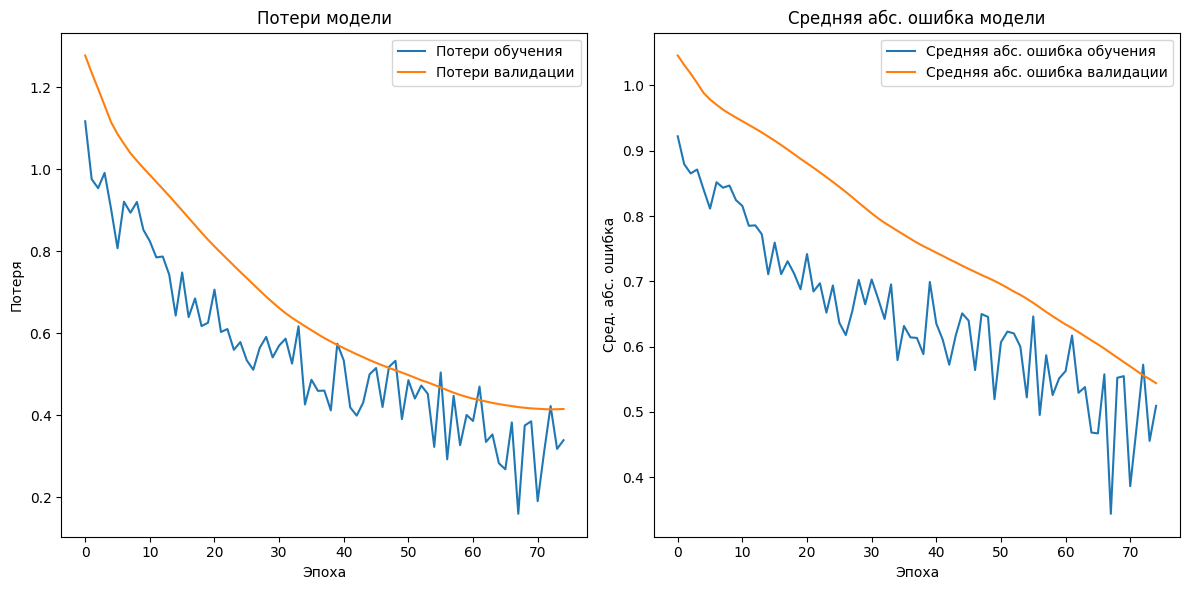

In [397]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Потери обучения")
plt.plot(history.history["val_loss"], label="Потери валидации")
plt.title("Потери модели")
plt.xlabel("Эпоха")
plt.ylabel("Потеря")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Средняя абс. ошибка обучения')
plt.plot(history.history['val_mae'], label='Средняя абс. ошибка валидации')
plt.title('Средняя абс. ошибка модели')
plt.xlabel('Эпоха')
plt.ylabel('Сред. абс. ошибка')
plt.legend()

plt.tight_layout()
plt.show()

Предскажем данные и рассмотрим метрики:

In [398]:
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

print(f"На основе: {X_test.reshape(-1, 1)}\nМодель предсказала: {y_pred}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
На основе: [[77.44]
 [14.53]
 [21.72]
 [19.64]
 [97.  ]
 [18.42]
 [75.5 ]]
Модель предсказала: [[1621.7031 ]
 [ 492.12326]
 [ 584.0246 ]
 [ 557.41644]
 [1913.0061 ]
 [ 541.8098 ]
 [1593.3099 ]]


In [399]:
R_squared_neuro = r2_score(y_test, y_pred)
latex_str = f"R^2 = {R_squared_neuro:.4f}"
display(Math(latex_str))

<IPython.core.display.Math object>

## Сравнительный анализ регрессионных моделей

Итак, в предыдущих шагах были определены **степенная регрессионная модель** и построена **нейросетевая регрессионная модель**. Сравним коэффициенты детерминации моделей:

In [400]:
latex_str = f"R^2 (степ) = {R_squared_power:.4f}"
display(Math(latex_str))
latex_str = f"R^2 (нейросеть) = {R_squared_neuro:.4f}"
display(Math(latex_str))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

В большинстве случаев, коэффициент детерминации больше у нейросетевой модели, т.е. она точнее предсказывает значения

Но во многом точность модели зависит от воли случая: очередная попытка обучения может оказаться неудачной. Связано это с небольшим набором данных, который подается на обучение. Также можно изменять множество параметров нейросети: количество слоев и нейронов на них, количество эпох и т.д.

Рассмотрим значения, которые предскажут модели. Допустим, что в следующем 2026 году, цены на нефть резко поднимутся до 100.

In [401]:
oil_price_2026 = 100
gdp_power = a_power * oil_price_2026 ** b_power

oil_price_2026_scaled = scaler_X.transform([[oil_price_2026]])
gdp_neuro_scaled = model.predict(oil_price_2026_scaled)
gdp_neuro = scaler_y.inverse_transform(gdp_neuro_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


In [402]:
print(f"2026 год:\nЦена на нефть: {oil_price_2026}")
print(f"====================================")
print(f"ВВП России (степенная модель): {gdp_power:.3f}")
print(f"ВВП России (нейронная модель): {gdp_neuro[0][0]:.3f}")

2026 год:
Цена на нефть: 100
ВВП России (степенная модель): 2274.251
ВВП России (нейронная модель): 1958.214


### Вывод

Таким образом, нейросетевые модели являются современным, гибким и точным инструментом для предсказания данных. Но для его использования требуются широкие знания в области Machine Learning.